# Predicting Customer Data for Tele Company

## Introduction

The objective of this project is to predict the type of customers for a Tele Communication Company. So, on the basis of this analysis they can retain and proceed further in their Targetted Market.

## Data Source & Overview

This Dataset was taken from Kaggle Repository.

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Preparations

Loading the Required Library and Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import altair as alt

In [2]:
pd.set_option('display.max_columns', None) 

df = pd.read_csv(r"C:/Users/karan/OneDrive/Desktop/Machine Learning/Project/S3801462_Data.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Let's check the shape of the Dataset.

In [3]:
df.shape

(7043, 21)

Let's have a look at the Datatype of each Column for our Dataset.

In [4]:
df.info() ##Additional Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe() # statistical description, only for numeric values

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Looking at the 5 Random Values from the dataset

In [6]:
df.sample(n=5, random_state=8)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1164  4782-OSFXZ  Female              1     Yes         No      71   
5179  9048-JVYVF    Male              0      No         No       3   
2129  9787-XVQIU    Male              0      No         No       1   
1963  7967-HYCDE    Male              0      No         No       8   
6478  9330-VOFSZ  Female              0     Yes         No      60   

     PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
1164          Yes           Yes             DSL            Yes          Yes   
5179          Yes            No             DSL             No           No   
2129          Yes           Yes     Fiber optic             No           No   
1963          Yes            No     Fiber optic             No           No   
6478          Yes           Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
1164              Yes         Yes          No             Yes        Two year   
5179               No         Yes         Yes             Yes  Month-to-month   
2129               No          No          No              No  Month-to-month   
1963               No          No          No              No  Month-to-month   
6478              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
1164              Yes  Bank transfer (automatic)           82.70       5831.2   
5179              Yes           Electronic check           69.35       191.35   
2129              Yes           Electronic check           75.30         75.3   
1963               No  Bank transfer (automatic)           70.70        553.4   
6478              Yes    Credit card (automatic)          110.80       6640.7   

     Churn  
1164    No  
5179   Yes  
2129   Yes  
1963    No  
6478    No

### Dropping the ID Column

The reason to drop ID Column is we can't get any relevant information from this Column.

In [7]:
df = df.drop("customerID", axis = 1)

### Sometimes Dataset has constatnt features that are also irrevelant to us. So, we need to remove them

In [8]:
df = df.loc[:, df.nunique() != 1]

### Checking for Missing Values

In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Summary Statistics

In [10]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
df.describe(include='int64')

SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

In [11]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
df.describe(include='object')

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7043    7043       7043         7043          7043            7043   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3555    3641       4933         6361          3390            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7043            7043             7043              7043   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2785            3875             4171              2365   

       TotalCharges Churn  
count          7043  7043  
unique         6531     2  
top                    No  
freq             11  5174

We observe that there are no missing values in our Data.

## Encoding Categorical Features

Before Modelling it is essential to convert our all the cateogorical features to numerical features.

### Encoding the Target Feature

In [12]:
Data = df.drop(columns='Churn')
target = df['Churn']
target.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
target = target.replace({'No': 0, 'Yes': 1})
target.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We converted our Target feature into Numerical Feature.

### Encoding Categorical Descriptive Features

There are two types of Categorical feature one is Nominal and other is Ordinal. Since, we can't see any ordinal feature we can proceed with One-Hot Encoding. Let's extract all the categorical feature.

In [14]:
categorical_cols = df.columns[df.dtypes==object].tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

For each two-level categorical variable, we set the drop_first option to True to encode the variable into a single column of 0 or 1. Next, we apply the get_dummies() function for the regular one-hot encoding for categorical features with more than 2 levels.

In [15]:
for col in categorical_cols:
    n = len(df[col].unique())
    if (n == 2):
        df[col] = pd.get_dummies(df[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
df = pd.get_dummies(df)

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'MultipleLines_No',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6571)

In [17]:
df.sample(5, random_state=999)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4210       0              1        1           1      61             1   
2099       0              0        1           0      40             1   
5302       0              0        1           1      10             1   
2791       1              0        0           0      57             1   
3471       0              0        0           0      35             1   

      PaperlessBilling  MonthlyCharges  Churn  MultipleLines_No  \
4210                 1           65.20      0                 0   
2099                 1           78.85      0                 0   
5302                 1           65.50      0                 1   
2791                 1           74.35      0                 1   
3471                 0           21.10      0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
4210                               0                  1                    1   
2099                               0                  1                    0   
5302                               0                  0                    1   
2791                               0                  0                    1   
3471                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
4210                            0                   0                  1   
2099                            1                   0                  1   
5302                            0                   0                  1   
2791                            0                   0                  0   
3471                            0                   1                  0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
4210                                   0                   0                1   
2099                                   0                   0                1   
5302                                   0                   0                0   
2791                                   0                   1                1   
3471                                   1                   0                0   

      OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
4210                                 0                 0                    0   
2099                                 0                 0                    1   
5302                                 0                 1                    1   
2791                                 0                 0                    0   
3471                                 1                 0                    0   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
4210                                     0                     1   
2099                                     0                     0   
5302                                     0                     0   
2791                                     0                     1   
3471                                     1                     0   

      TechSupport_No  TechSupport_No internet service  TechSupport_Yes  \
4210               1                                0                0   
2099               0                                0                1   
5302               0                                0                1   
2791               1                                0                0   
3471               0                                1                0   

      StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  \
4210               0                                0                1   
2099               1                                0                0   
5302               1                                0                0   
2791               0                                0                1   
3471               0  

## Scaling Of Features

After Encoding we perform Min-Max Scaling to our Dataset but before that we make a copy of our Dataset to keep tracks on our columns.

In [18]:
from sklearn import preprocessing

Data_df = df.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(df)
Data = Data_scaler.fit_transform(df)

We can see that even after scaling our binary features are still kept as a binary that's why we opted with Min-Max Scaling.


In [19]:
pd.DataFrame(df, columns=Data_df.columns).sample(5, random_state=999)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4210       0              1        1           1      61             1   
2099       0              0        1           0      40             1   
5302       0              0        1           1      10             1   
2791       1              0        0           0      57             1   
3471       0              0        0           0      35             1   

      PaperlessBilling  MonthlyCharges  Churn  MultipleLines_No  \
4210                 1           65.20      0                 0   
2099                 1           78.85      0                 0   
5302                 1           65.50      0                 1   
2791                 1           74.35      0                 1   
3471                 0           21.10      0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
4210                               0                  1                    1   
2099                               0                  1                    0   
5302                               0                  0                    1   
2791                               0                  0                    1   
3471                               0                  0                    0   

      InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
4210                            0                   0                  1   
2099                            1                   0                  1   
5302                            0                   0                  1   
2791                            0                   0                  0   
3471                            0                   1                  0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
4210                                   0                   0                1   
2099                                   0                   0                1   
5302                                   0                   0                0   
2791                                   0                   1                1   
3471                                   1                   0                0   

      OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
4210                                 0                 0                    0   
2099                                 0                 0                    1   
5302                                 0                 1                    1   
2791                                 0                 0                    0   
3471                                 1                 0                    0   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
4210                                     0                     1   
2099                                     0                     0   
5302                                     0                     0   
2791                                     0                     1   
3471                                     1                     0   

      TechSupport_No  TechSupport_No internet service  TechSupport_Yes  \
4210               1                                0                0   
2099               0                                0                1   
5302               0                                0                1   
2791               1                                0                0   
3471               0                                1                0   

      StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  \
4210               0                                0                1   
2099               1                                0                0   
5302               1                                0                0   
2791               0                                0                1   
3471               0  

## Feature Selection & Ranking

Now, we'll try to find top 10 most important feature in our Dataset. These Datasets will be ranked on how much insight they can provide in our research. For this we'll use scikit-learn module.

In [20]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(df, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['Churn', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month',
       'OnlineSecurity_No', 'PaymentMethod_Electronic check',
       'TechSupport_No', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaperlessBilling'], dtype=object)

In [21]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.41071135, 0.05603145, 0.04392131, 0.02808832, 0.01746515,
       0.01550579, 0.01496387, 0.01339367, 0.01311263, 0.0116532 ])

We observe that most important feature is Churn followed by 'tenure' and 'MonthlyCharges'.

## Data Exploration

Our Data could can be considered as clean and we are ready for Data Exploration

## Univariate Visualization

Let's get a Box-Plot of Monthly Charges.

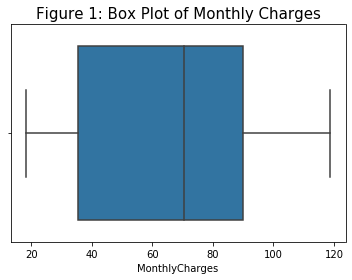

In [22]:
sns.boxplot(df['MonthlyCharges']).set_title('Figure 1: Box Plot of Monthly Charges', fontsize = 15)
plt.show();

Let's get a Histogram of Tenure

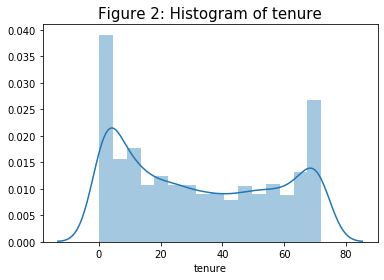

In [23]:
sns.distplot(df['tenure'], kde = True).set_title('Figure 2: Histogram of tenure', fontsize = 15)
plt.show();

## Multivariate Visualization

Scatter plot of Tenure vs Monthly Charges 

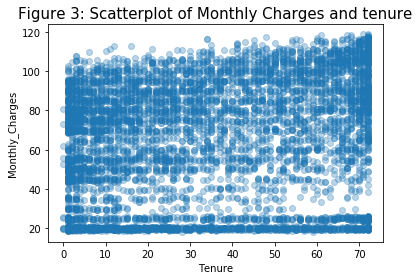

In [24]:
t = df['tenure']

# get a scatter plot
plt.scatter(t, df['MonthlyCharges'], alpha = 0.3)
plt.title('Figure 3: Scatterplot of Monthly Charges and tenure', fontsize = 15)
plt.xlabel('Tenure')
plt.ylabel('Monthly_Charges')
plt.show();

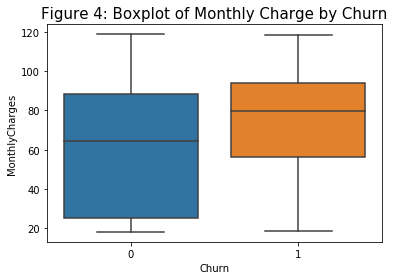

In [25]:
sns.boxplot(df['Churn'], df['MonthlyCharges']);
plt.title('Figure 4: Boxplot of Monthly Charge by Churn', fontsize = 15)
plt.show();

From fig.4 we can easily conclude that people who exit the subscription has lower Monthly Bills.

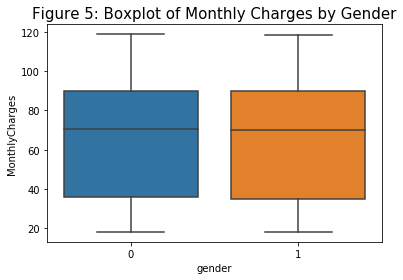

In [26]:
sns.boxplot(df['gender'], df['MonthlyCharges']);
plt.title('Figure 5: Boxplot of Monthly Charges by Gender', fontsize = 15)
plt.show();

From fig.5 We can conclude that monthly bill dosen't depend on Gender. So, we can't target our customers on the basis of Gender.

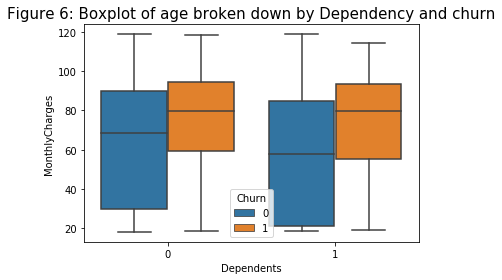

In [27]:
# Getting the index of those who have completed their Bachelors or HS graduate
edu_mask = df['Churn'].isin(['0','1'])

# Getting the index of those who are male and Not_in_family or a Husband
family_mask = (df['Dependents'].isin(['Yes','No'])) & (df['gender'].isin(['Male','Female']))

# Selecting the rows of those who are Not_in_family, husband or wife and 
# have completed either a Bachelors or just graduated high school
education_relationship = df[(edu_mask) | (edu_mask & family_mask)]

# Creating the boxplot
sns.boxplot(education_relationship['Dependents'], education_relationship['MonthlyCharges'], 
            hue = education_relationship['Churn'])
plt.title('Figure 6: Boxplot of age broken down by Dependency and churn', fontsize = 15)
plt.show();


From fig.6 We can see that the people who dosen't have any dependents have tend to lower monthly charges as compare to those who has. Those people who has dependency tend to exit from the subscription lesser as compare to others.

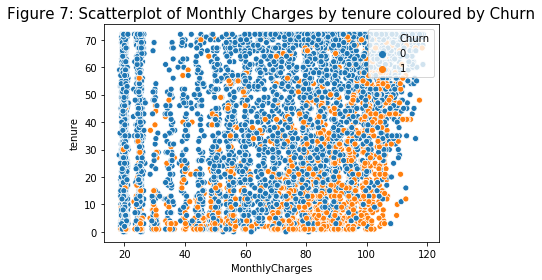

In [28]:
gov_mask = df['Churn'].isin(['0','1'])

# creating a dataframe of those who work in the government
gov = df[gov_mask]

# creating a scatterplot
sns.scatterplot(gov['MonthlyCharges'], gov['tenure'], hue = gov['Churn'])
plt.title('Figure 7: Scatterplot of Monthly Charges by tenure coloured by Churn', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Data Sampling & Train-Test Splitting

The original Dataset has more than 7000 observations which is a lot. So, we will work with small observation of 2000.
We, will select 2000 random observations from our Data and than split this sample into train and test partitions with a 70:30 ratio

In [29]:
n_samples = 2000

Data_sample = pd.DataFrame(df).sample(n=n_samples, random_state=8).values
target_sample = pd.DataFrame(target).sample(n=n_samples, random_state=8).values

print(Data_sample.shape)
print(target_sample.shape)

(2000, 6571)
(2000, 1)


In [30]:
from sklearn.model_selection import train_test_split

Data_sample_train, Data_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_sample, target_sample, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target_sample)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(1400, 6571)
(600, 6571)


## Model Evaluation Strategy

In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

## Hyperparameter Tuning 
### K-Nearest Neighbors (KNN)¶

Using Pipeline, we stack feature selection and grid search for KNN hyperparameter tuning via cross-validation. We will use the same Pipeline methodology for NB and DT. The intuition behind the KNN algorithm is that it simply calculates the distance of a new data point to all other training data points. 

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [34]:
gs_pipe_KNN.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:  3.0min finished


In [35]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__n_features_': 10}

In [36]:
gs_pipe_KNN.best_score_

0.8981424148606811

We can see that optimal KNN value is 0.893.The best performing KNN selected 10 features with 20 nearest neighbors and  p=1 , which is the Manhattan distance. 

In [37]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [38]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

mean_score  std_score  max_score  min_score  knn__n_neighbors  knn__p  \
12    0.898142   0.014548   0.926406   0.886932              10.0     1.0   
13    0.889332   0.011274   0.910346   0.876483              10.0     1.0   
6     0.888042   0.019661   0.920021   0.865003               5.0     1.0   
18    0.884630   0.016571   0.916989   0.871098              15.0     1.0   
24    0.882095   0.018356   0.918795   0.872388              20.0     1.0   

    rfi_fs__n_features_  
12                 10.0  
13                 20.0  
6                  10.0  
18                 10.0  
24                 10.0

We can clearly see the difference between hyperparameter combinations is quite big.

In [39]:
import altair as alt

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

## (Gaussian) Naive Bayes (NB)

In Gaussian Naive Bayes we assume that continous values associated with features are distributed to a Gausian Distribution. In which every pair of features is independent to each other.

In [40]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(Data_sample_train)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, target_sample_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.7min finished


In [42]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 0.007663410868007455}

In [43]:
gs_pipe_NB.best_score_

1.0

The optimal Naive Bayes scores 1 which is higher than KNN. But still we can't say that Naive Bayes outperformed KNN, we will perorm t-test below:

In [44]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

mean_score  std_score  max_score  min_score  rfi_fs__n_features_  \
0          1.0        0.0        1.0        1.0                 10.0   
11         1.0        0.0        1.0        1.0                 20.0   
18         1.0        0.0        1.0        1.0                 20.0   
14         1.0        0.0        1.0        1.0                 10.0   
13         1.0        0.0        1.0        1.0                 10.0   

    nb__var_smoothing  
0            0.007663  
11           0.042476  
18           0.012174  
14           0.003827  
13           0.026738

In [45]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

## Decision Trees (DT)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
For our Decision Tree we will use gini index to maximize information gain.

In [46]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  1.4min finished


In [47]:
gs_pipe_DT.best_params_

{'dt__max_depth': 3, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [48]:
gs_pipe_DT.best_score_

1.0

The AUC score of our DT is 1 which is equal to AUC score of Naive Basis. So, our visualization will be also in straight line.

In [49]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

## Further Fine Tuning¶

We'll need to futher analysis in case we are missing something.

In [50]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:   56.4s finished


In [51]:
gs_pipe_DT2.best_params_


{'dt__max_depth': 5, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [52]:
gs_pipe_DT2.best_score_

1.0

After analysis we can conclude that we can't achieve better results than our prvious analysis.

In [53]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

mean_score  std_score  max_score  min_score  dt__max_depth  \
0         1.0        0.0        1.0        1.0            5.0   
1         1.0        0.0        1.0        1.0            5.0   
2         1.0        0.0        1.0        1.0            5.0   
3         1.0        0.0        1.0        1.0            5.0   
4         1.0        0.0        1.0        1.0           10.0   

   dt__min_samples_split  rfi_fs__n_features_  
0                    5.0                 10.0  
1                   50.0                 10.0  
2                  100.0                 10.0  
3                  150.0                 10.0  
4                    5.0                 10.0

## Performance Comparison

We used 2000 rows in our training data within a cross-validation framework and we determined the best hyperparameter values for each of the three classifiers.
Now, we will fit each tuned clasifier into the 1000 rows data set. We, will conduct a paired t-test for the AUC score between the classifier.

KNN VS NB

NB VS DT

DT VS KNN

For Performance Comaprision we will use two nested cross validation.

In [54]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8419667563114039

In [55]:
Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

1.0

In [56]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

1.0

Since we fixed the random state to be same during cross-validation, all classifiers were fitted and than tested on same data. Now , we can evaluate our AUC scores better. So, we use the stats.ttest_rel function from the SciPy module to run the following t-tests.

In [57]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-9.601987783464477, pvalue=5.012249707477168e-06)
Ttest_relResult(statistic=9.601987783464477, pvalue=5.012249707477168e-06)
Ttest_relResult(statistic=nan, pvalue=nan)


A p-value smaller than 0.05 indicates a statistically significant difference.
Though we used AUC to optimize the algorithm hyperparameters, we shall consider the following metrics to evaluate models based on the test set:

Accuracy,
Precision,
Recall,
F1 Score (the harmonic average of precision and recall),
Confusion Matrix

In [58]:
pred_KNN = gs_pipe_KNN.predict(Data_sample_test)

In [59]:
Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [60]:
pred_DT = gs_pipe_DT2.predict(Data_sample_test)

In [61]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_sample_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_sample_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_sample_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       437
           1       0.79      0.51      0.62       163

    accuracy                           0.83       600
   macro avg       0.81      0.73      0.75       600
weighted avg       0.83      0.83      0.82       600


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00       163

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00       163

    accuracy                           1.00       600
  

In [62]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_sample_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_sample_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_sample_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[415  22]
 [ 80  83]]

Confusion matrix for Naive Bayes
[[437   0]
 [  0 163]]

Confusion matrix for Decision Tree
[[437   0]
 [  0 163]]


In this we will choose recall as our performance metric and DT and naive basis has highest recall value.

## Summary

The Decision Tree has model with 10 of the best features selected by Random Forest Importance (RFI) produces the highest cross-validated AUC score on the training data. In addition to that when we evaluated test data Decision Tree and Naive Basis had same value still both the tests outperformed KNN. We have also observe that our model is not sensitive to RFI values. It's difficult to say that we should go further with which model either DT or NB.